In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
features = ['pclass', 'sex', 'age', 'fare', 'survived']

# pipeline for numerical features
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# pipeline for categorical features
categorical_features = ['pclass', 'sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# applying the preprocessing to the dataset
X = preprocessor.fit_transform(titanic_df[features])

In [8]:
# Applying SVD
svd = TruncatedSVD(n_components=4)
Y = svd.fit_transform(X)

print("Singular Values: ", svd.singular_values_)
print("Explained Variance Ratio: ", svd.explained_variance_ratio_)

Singular Values:  [34.0919237  29.83381513 28.43241553 18.6007055 ]
Explained Variance Ratio:  [0.37544109 0.16349524 0.21253133 0.12019999]


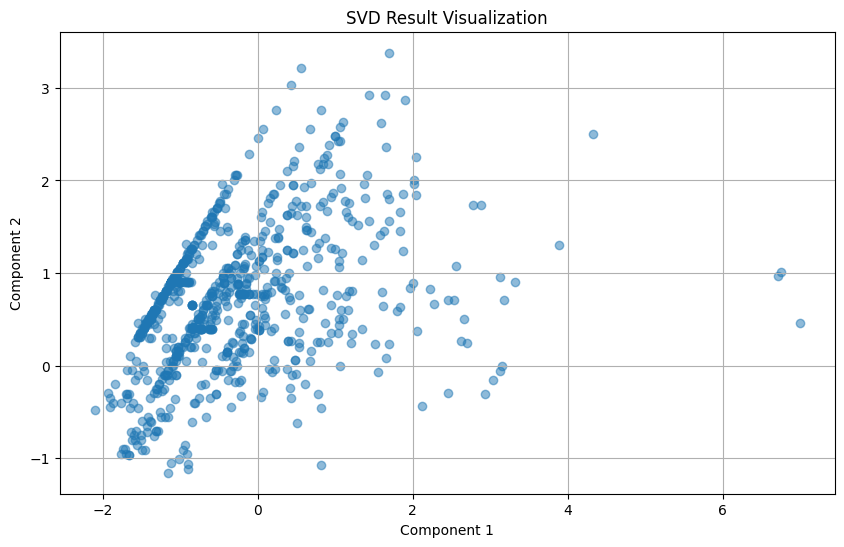

In [9]:
import matplotlib.pyplot as plt

# Assuming Y is the rsult of SVD with 2 components
plt.figure(figsize=(10, 6))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.5)
plt.title('SVD Result Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

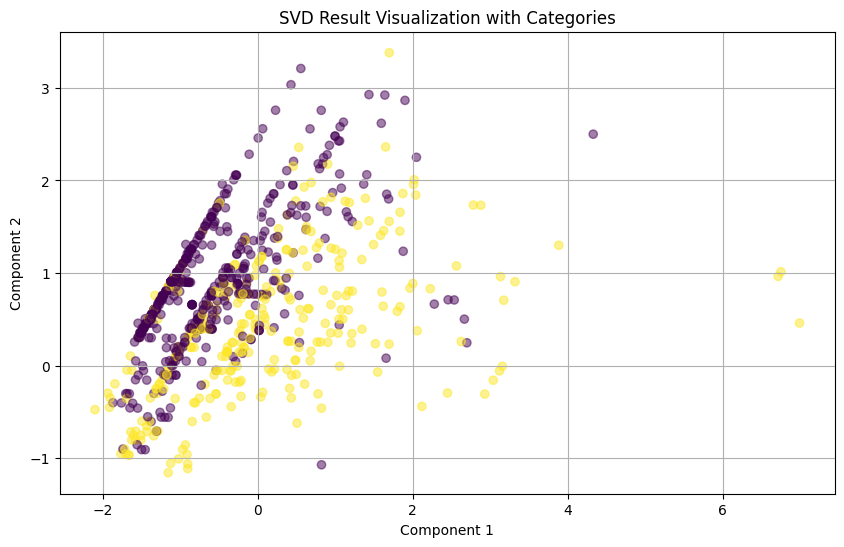

In [11]:
# Assuming 'survived' is the last column in the features you selected

categories = titanic_df['survived'].values
plt.figure(figsize=(10, 6))
plt.scatter(Y[:, 0], Y[:, 1], c=categories, cmap='viridis', alpha=0.5)
plt.title('SVD Result Visualization with Categories')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()